# Student placement prediction using Machine Learning

#Start

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Placement.csv')

In [ ]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [ ]:
df.columns

Index(['Student_ID', 'CGPA', 'IQ', 'Placement'], dtype='object')

In [ ]:
x = df[['CGPA', 'IQ']]

In [ ]:
x

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [ ]:
y = df['Placement']

In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

# Standardized x

In [ ]:
from sklearn.preprocessing  import StandardScaler
ss = StandardScaler()

In [ ]:
x = ss.fit_transform(x)

In [ ]:
x

array([[ 0.71095807, -0.01459341],
       [-0.0799718 , -0.44233119],
       [-0.60725838, -0.0649155 ],
       [ 1.23824465,  0.21185601],
       [-0.16785289,  0.46346647],
       [ 0.97460136, -1.90167186],
       [-0.25573399,  0.48862751],
       [-0.87090167, -1.52425617],
       [ 0.0957904 ,  0.81572111],
       [-0.78302057, -1.44877303],
       [ 0.0079093 , -1.977155  ],
       [ 0.79883917,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 0.35943369, -0.19072073],
       [ 0.0957904 , -0.51781433],
       [-0.78302057,  1.31894203],
       [-0.69513948,  2.52667224],
       [-2.36488031,  1.49506935],
       [-1.74971264, -0.59329747],
       [-0.69513948,  0.21185601],
       [ 0.53519588, -0.09007654],
       [ 0.97460136,  0.68991588],
       [-0.95878277, -0.09007654],
       [-1.13454496, -0.92039106],
       [-1.13454496, -0.0649155 ],
       [-0.87090167, -0.81974688],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 ,  0.01056764],
       [-0.69513948,

#Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train , x_test, y_train , y_test = train_test_split(x,y,train_size= 0.7 ,random_state = 12529) # random_state = any number (to fixed  the combination number of random combination )

#Training

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predict = lr.predict(x_test)

In [ ]:
y_predict

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0])

#Get Probability of Each Predicted Class



In [ ]:
lr.predict_proba(x_test)

array([[0.78346924, 0.21653076],
       [0.9460934 , 0.0539066 ],
       [0.97437897, 0.02562103],
       [0.3517858 , 0.6482142 ],
       [0.90117101, 0.09882899],
       [0.0544566 , 0.9455434 ],
       [0.09489566, 0.90510434],
       [0.32072309, 0.67927691],
       [0.13275445, 0.86724555],
       [0.97574048, 0.02425952],
       [0.5474196 , 0.4525804 ],
       [0.98844619, 0.01155381],
       [0.91776568, 0.08223432],
       [0.11466783, 0.88533217],
       [0.03588197, 0.96411803],
       [0.26053689, 0.73946311],
       [0.44382938, 0.55617062],
       [0.91527992, 0.08472008],
       [0.44268389, 0.55731611],
       [0.58103687, 0.41896313],
       [0.98148382, 0.01851618],
       [0.14411611, 0.85588389],
       [0.88897715, 0.11102285],
       [0.57143947, 0.42856053],
       [0.3662391 , 0.6337609 ],
       [0.27281906, 0.72718094],
       [0.80142585, 0.19857415],
       [0.02026657, 0.97973343],
       [0.93266463, 0.06733537],
       [0.96091188, 0.03908812]])

# Get modelEvaluted

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report 

In [ ]:
confusion_matrix (y_test ,y_predict)

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.74      0.85        19

    accuracy                           0.83        30
   macro avg       0.84      0.87      0.83        30
weighted avg       0.89      0.83      0.84        30



#visualization

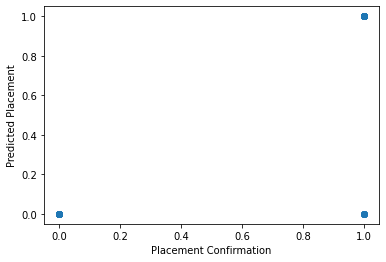

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_predict)
plt.xlabel('Placement Confirmation')
plt.ylabel('Predicted Placement')

plt.show()


#Get Future Predictictions

let select a random sample from existing dataset as new value
Steps to follow :

1) Extract a random row using sample function

2)Seprate x and y

3)Predict


In [ ]:
df_new = df.sample(1)

In [ ]:
df_new

,Student_ID,CGPA,IQ,Placement
94,95,4.7,52,0


In [ ]:
df_new

,Student_ID,CGPA,IQ,Placement
94,95,4.7,52,0


In [ ]:
x_new = df[['CGPA', 'IQ']]

In [ ]:
x_new = ss.fit_transform(x_new)

In [ ]:
x_new

array([[ 0.71095807, -0.01459341],
       [-0.0799718 , -0.44233119],
       [-0.60725838, -0.0649155 ],
       [ 1.23824465,  0.21185601],
       [-0.16785289,  0.46346647],
       [ 0.97460136, -1.90167186],
       [-0.25573399,  0.48862751],
       [-0.87090167, -1.52425617],
       [ 0.0957904 ,  0.81572111],
       [-0.78302057, -1.44877303],
       [ 0.0079093 , -1.977155  ],
       [ 0.79883917,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 0.35943369, -0.19072073],
       [ 0.0957904 , -0.51781433],
       [-0.78302057,  1.31894203],
       [-0.69513948,  2.52667224],
       [-2.36488031,  1.49506935],
       [-1.74971264, -0.59329747],
       [-0.69513948,  0.21185601],
       [ 0.53519588, -0.09007654],
       [ 0.97460136,  0.68991588],
       [-0.95878277, -0.09007654],
       [-1.13454496, -0.92039106],
       [-1.13454496, -0.0649155 ],
       [-0.87090167, -0.81974688],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 ,  0.01056764],
       [-0.69513948,

In [ ]:
y_pred_new = lr.predict(x_new)

In [ ]:
y_pred_new

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [ ]:
lr.predict_proba(x_new)